# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [13]:
import pandas as pd
%matplotlib inline

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties',['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
json.load((open('data/world_bank_projects.json')))
df = pd.read_json('data/world_bank_projects.json')

In [9]:
df_cut = df[['countryname','mjtheme','mjthemecode','mjtheme_namecode']]

## Find the top 10 countries with most projects

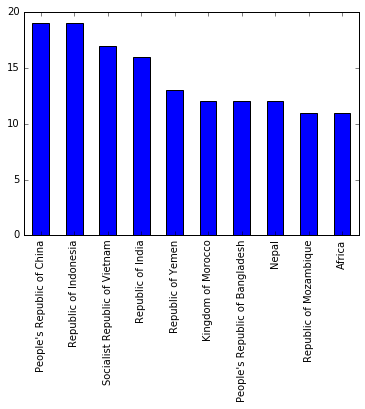

In [14]:
df_cut.countryname.value_counts().head(10).plot(kind='bar')

## Find the top 10 major project themes

In [15]:
df_cut['mjthemecode'] = df_cut['mjthemecode'].apply(lambda x: x.split(','))
themecode = df_cut.apply(lambda x: pd.Series(x['mjthemecode']), axis=1).stack().reset_index(level=1, drop=True)
themecode.name = 'mjthemecode'
df_cut = df_cut.drop('mjthemecode', axis=1).join(themecode).reset_index()
df_cut.drop('index',1,inplace=True)
x = json.load((open('data/world_bank_projects.json')))
namecode = json_normalize(x, 'mjtheme_namecode')
namecode.drop('code',1, inplace=True)
df_cut = df_cut.join(namecode)

/Users/sheldon.smickley/anaconda/envs/bbc/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
'''
test_df = final_df[['mjthemecode','name']]
test_df.drop_duplicates('mjthemecode',inplace=True)
test_df.sort('mjthemecode')
'''
df_cut.loc[df_cut.mjthemecode == '1', 'name'] = 'Economic management'
df_cut.loc[df_cut.mjthemecode == '2', 'name'] = 'Public sector governance'
df_cut.loc[df_cut.mjthemecode == '3', 'name'] = 'Rule of law'
df_cut.loc[df_cut.mjthemecode == '4', 'name'] = 'Financial and private sector development'
df_cut.loc[df_cut.mjthemecode == '5', 'name'] = 'Trade and integration'
df_cut.loc[df_cut.mjthemecode == '6', 'name'] = 'Social protection and risk management'
df_cut.loc[df_cut.mjthemecode == '7', 'name'] = 'Social dev/gender/inclusion'
df_cut.loc[df_cut.mjthemecode == '8', 'name'] = 'Human development'
df_cut.loc[df_cut.mjthemecode == '9', 'name'] = 'Urban development'
df_cut.loc[df_cut.mjthemecode == '10', 'name'] = 'Rural devlopment'
df_cut.loc[df_cut.mjthemecode == '11', 'name'] = 'Environment and natural resources management'

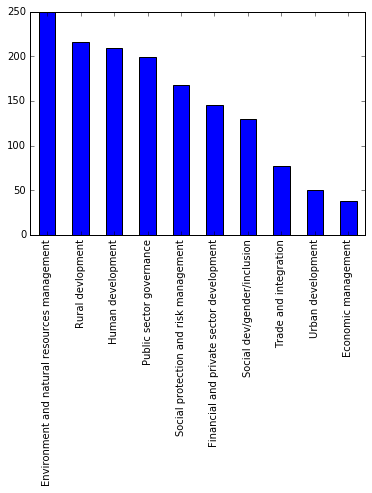

In [17]:
df_cut.name.value_counts().head(10).plot(kind='bar')